# Präsentation

https://oskarstalberg.com/game/wave/wave.html

Überblick:
1. Einleitung - Was ist Wave Function Collapse
2. Zwei Varianten - Das Original, und die Verallgemeinerung
3. High Level Überblick über die zwei Stages des Algorithmus
    1. a
4. Erklärung des original Algorithmus
    
5. Erklärung des Verallgemeinerten Algorithmus

Der Algorithmus besteht aus zwei phasen:
1. Beschaffung der Metadaten (Content Segmente, und Nachbarschafts regeln)
2. Füllen aller Slots mit den Content Segmenten, unter beachtung der Nachbarschafts regeln.

Wave Function Collapse is an algorithm in the family of Procedural Generation Algorithms.  
The purpose of the original version is to generate images on a 2D pixel grid by relying solely on local adjecency rules infered from an example image.  

This original version has seen a number of modifications and extensions over time, including but not limited to:  
- Generalizing to 3D (or any other dimension, although that is not as practical)
- Become content agnostic, meaning it doesn't work on pixel values, but abstract "tiles"
- changing how adjecency rules are gathered
- including global or regional constraints like generating a certain feature exactly once in the entire output

## Zwei Varianten des WFC Algorithmus

### Kernel Based

Example: Caves of Qud

```python
def KernelWFC(InputImage:Image,
              KernelSize:(int, int),
              OutputSize:(int, int),
              WrapInput :bool,
              WrapOutput:bool,
              Symmetries:int,
              FrequencyHints:bool) -> Image:
    ...
```

Loading:  
- Takes an existing image as input
- Extracts all patches of configurable size (usually 3x3) from the input image

Generating:
- Picks 

The Tiles and the neighboorhood rules can be generated from an existing example.  
1. For that purpose the image (2D) or mesh (3D) is analyzed for equally sized cells which appear multiple times (in essence what a compression algorithm would do).
2. The szene is then split into these discrete chunks, and the neighboors of each chunk are analysed for infer neighboorhood rules.  
3. The downside here is that variations that did not appear in the input, but would be consistent with its rules will not appear in the output. The output will however look quite similar structurally to the input.

```python
def Run():
    PatternsFromSample()
    BuildPropagator() # auch genannt index
    while not finished:
        Observe()
        Propagate()
    OutputObservations()
```

```python
def Observe(coefficient_matrix):
    FindLowestEntropy()
    if there is a contradiction: throw an error and quit
    if all cells are at entropy 0:
        processing is complete
        return CollapsedObservations()
    else:
        Choose a pattern by a random sample, weighted by the
            pattern frequency in the source data
        Set the boolean array in this cell to false, except
            for the chosen pattern
```

```python
def FindLowestEntropy(coefficient_matrix):
    Return the cell that has the lowest greater-than-zero
        entropy, defined as:
        A cell with one valid pattern has 0 entropy
        A cell with no valid patterns is a contradiction
        else: the entropy is based on the sum of the frequency
            that the patterns appear in the source data, plus
            Use some random noise to break ties and
                near-ties.
```

```python
def Propagate(coefficient_matrix): # flood-fill
    while more cells are left to be update:
        for each neighboring cell:
            for each pattern that is still potentially valid:
                Compare this location in the pattern with the cell's values
                    if this point in the pattern no longer matches:
                        Set the array in the wave to false for this pattern
                        Flag this cell as needing to be updated in the next iteration
```

```python
def OutputObservations(coefficient_matrix):
    for each cell:
        Set observed value to the average of the color value
            of this cell in the pattern for the remaining valid patterns
    return the observed values as an output image
```

### Tile Based

Example: bad north, townscaper

```python
def TileWFC(AdjacencyRules:dict,
            OutputSize:(int, int),
            WrapOutput:bool,
            Symmetries:int,
            FrequencyHints:bool) -> Image:
    ...
```

1. Have a set of tiles that will make up the world, together with rules which tiles fit next to each other.
2. Pick a random empty tile in the world and randomly choose one of the tiles to fill it with
3. Now propagate the neighboorhood rules to all cells, eliminating possibilities for which tiles can be placed where
4. Chose the empty tile with the lowest number of possibilities, and randomly pick one of the possible tiles to place there
5. Repeate the above steps until there are no more empty tiles.
6. Ein Backtracking ist evtl. notwendig wenn der algorithmus an einen punkt gelangt wo eine zelle keine möglichen tiles hat die dort plaziert werden könnten.
7. Wenn die regeln nicht gut gewählt sind, kann es (glaube ich) dazu kommen, dass bestimmte features nie generiert werden, oder dass man an einem Punkt ankommt wo eine zelle keine möglichen ausprägungen mehr hat.

## Algorithm

## Global and local constraints

#### Global restarts vs backtracking

## Sources

- [1] Superpositions, Sudoku, the Wave Function Collapse algorithm.
    - https://youtu.be/2SuvO4Gi7uY
    - [Martin Donald](https://www.youtube.com/c/MartinDonald)
- [2] Why I'm Using Wave Function Collapse for Procedural Terrain | Unity Devlog
    - https://youtu.be/20KHNA9jTsE
    - [DV Gen](https://www.youtube.com/channel/UCt9Rb0CWT8-bbsJtUOg6BsA)
- [3] Playing With The Wave Function Collapse Algorithm
    - https://youtu.be/GeBI9Bvo9oM
    - [Giant Bee](https://www.youtube.com/channel/UCMmnI7Fm3CglKF2AIpvGrLg)
- [4] How Townscaper Works: A Story Four Games in the Making | AI and Games
    - https://youtu.be/_1fvJ5sHh6A
    - [AI and Games](https://www.youtube.com/c/AIGamesSeries)
- [5] Wave Function Collapse Tutorial Unity (Playlist)
    - https://youtube.com/playlist?list=PLcRSafycjWFeKAS40OdIvhL7j-vsgE3eg
    - [Sunny Valley Studio](https://www.youtube.com/c/SunnyValleyStudio)
- [6] EPC2018 - Oskar Stalberg - Wave Function Collapse in Bad North
    - https://youtu.be/0bcZb-SsnrA
    - [BUas Games](https://www.youtube.com/channel/UC60WsaNESJpLHZ5Hjpuy7UQ)
- [7] Markov Chain based Wave Function Collapse
    - https://youtu.be/0W7yCuwlrbU
    - [Pronay Peddiraju](https://www.youtube.com/channel/UCZ6Pq8Ko3EUoVapphx8Pl0g)
- [8] Tile-Based Map Generation using Wave Function Collapse in 'Caves of Qud'
    - https://youtu.be/AdCgi9E90jw
    - [GDC](https://www.youtube.com/channel/UC0JB7TSe49lg56u6qH8y_MQ)
- [9] WaveFunctionCollapse is Constraint Solving in the Wild
    - https://adamsmith.as/papers/wfc_is_constraint_solving_in_the_wild.pdf
    - Isaac Karth, Adam M. Smith (2017)
- [10] Townscaper Announcement Trailer
    - https://youtu.be/QtVkteAS15M
    - [Raw Fury](https://www.youtube.com/channel/UCbyFV2lioP9a1YlUC4gm6xA)
- [11] Interactive Wave Function Collapse Demo
    - https://oskarstalberg.com/game/wave/wave.html
    - [Oskar Stålberg](oskarstalberg.com)
- [12] Original Wave Function Collapse GitHub Repo
    - https://github.com/mxgmn/WaveFunctionCollapse
    - [Maxim Gumin](https://github.com/mxgmn)
- [13] Procedural Generation with Wave Function Collapse
    - https://www.gridbugs.org/wave-function-collapse/
    - [Grid Bugs](https://www.gridbugs.org/)

# Code

In [ ]:
%matplotlib notebook

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from copy import deepcopy
from pprint import pprint
from pathlib import Path
import cv2
from collections import defaultdict

In [ ]:
choice = np.random.choice

# 1D

In [ ]:
def show_line(Line):
    %matplotlib inline
    plt.axis('off')
    plt.imshow([Line])

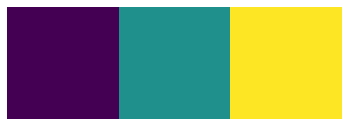

In [ ]:
show_line([1, 2, 3])

In [ ]:
def animate_lines(Lines):
    %matplotlib notebook
    fig, ax = plt.subplots()
    ax.axis('off')
    img = ax.imshow([Lines[-1]], animated=True)
    
    def animate(frame, *fargs):
        img.set_data([frame])
        
    return animation.FuncAnimation(fig, animate, frames=Lines, interval=500, repeat=True)

<IPython.core.display.Javascript object>


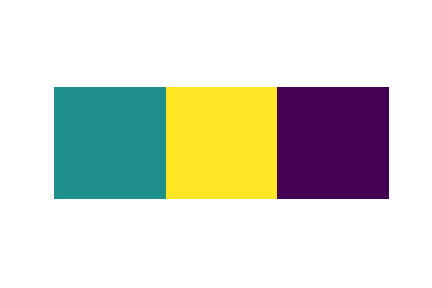

In [ ]:
animate_lines([
    [0, 0, 0],
    [1, 2, 3],
    [2, 3, 1],
    [3, 1, 2],
]);

### Complete Wave Function Collapse 1D

In [ ]:
def D1_WaveFunctionCollapse(N, PossibleValuesRules) -> (list, list):
    AllLines = list()
    NumberOfPossibleValues = len(PossibleValuesRules)
    PossibleValues         = list(PossibleValuesRules.keys())
    PossibleValuesIdxs     = np.arange(NumberOfPossibleValues)
    Line             = np.zeros(shape=N, dtype=int)
    AllLines.append(deepcopy(Line))
    WaveFunction     = np.ones(shape=(N, NumberOfPossibleValues), dtype=bool)
    LineHasCollapsed = np.zeros(shape=N, dtype=bool)
    
    X = choice(N) # Choose initial cell to collapse
    while True:
        PossibleIdxForX = PossibleValuesIdxs[WaveFunction[X]]
        assert len(PossibleIdxForX) > 0
        ChoiceIdxForX   = choice(PossibleIdxForX) # Choose what value to collapse to, among the remaining possible ones.
        Line[X]         = PossibleValues[PossibleValuesIdxs[ChoiceIdxForX]] # Apply choice to cell
        AllLines.append(deepcopy(Line))
        
        LineHasCollapsed[X] = True
        WaveFunction[X]     = False # numpy broadcasting
        
        WaveFunctionHasChanged = True
        while WaveFunctionHasChanged: # execute at least once
            WaveFunctionHasChanged = False
            for i in range(0, N):
                if LineHasCollapsed[i]:
                    # print(f'{i} Collapsed')
                    continue # Dont update the wavefunction of a cell that has already collapsed
                CurrentElement      = Line[i]
                CurrentWaveFunction = WaveFunction[i]
                NewWaveFunction     = np.ones_like(CurrentWaveFunction)
                
                def check_element(idx):
                    "Checks what values are permitted at the current element, based on what is present at this neighboor."
                    OtherElement, OtherWaveFunction = Line[idx], WaveFunction[idx]
                    if LineHasCollapsed[idx]:
                        AllowedValues = PossibleValuesRules[OtherElement]
                    else:
                        AllowedValues = [Value for (V, W) in zip(PossibleValues, OtherWaveFunction) for Value in PossibleValuesRules[V] if W]
                    for ValueIdx, Value in enumerate(PossibleValues):
                        if Value in AllowedValues:
                            # if another cell has already made this value impossible, it can't be made possible again here.
                            NewWaveFunction[ValueIdx] &= True
                        else:
                            NewWaveFunction[ValueIdx] = False

                if i > 0  : check_element(i-1)
                if i < N-1: check_element(i+1)
                NumberOfPossibleValues = sum(NewWaveFunction)
                assert NumberOfPossibleValues != 0, f'{i} {WaveFunction}'
                if NumberOfPossibleValues == 1: # Collapse this element
                    Line[i]                = PossibleValues[PossibleValuesIdxs[NewWaveFunction][0]]
                    AllLines.append(deepcopy(Line))
                    LineHasCollapsed[i]    = True
                    WaveFunction[i]        = False # numpy broadcasting
                    WaveFunctionHasChanged = True
                else:
                    WaveFunction[i] = NewWaveFunction
                    WaveFunctionHasChanged |= any(CurrentWaveFunction != NewWaveFunction)
                # print(i, CurrentWaveFunction, NewWaveFunction)
        
        NumberOfPossibleStates = WaveFunction.sum(axis=1)
        # Get the field with the lowest number of non-zero (non-collapsed) states.
        # If there are multiple fields, pick one of those at random.
        RemainingUncertainFields = np.flatnonzero(LineHasCollapsed == False)
        if len(RemainingUncertainFields) == 0: break # STOP condition
        
        # There are two way of calculating what the number of least, non-zero, possibilities is:
        # LeastNumberOfRemainingStates = np.min(NumberOfPossibleStates,
        #                                       where=(LineHasCollapsed == False),
        #                                       initial=NumberOfPossibleValues)

        LeastNumberOfRemainingStates = np.min(NumberOfPossibleStates[RemainingUncertainFields])

        # Choose which cell to collapse next
        X = choice(np.flatnonzero(NumberOfPossibleStates == LeastNumberOfRemainingStates))
    return Line, AllLines

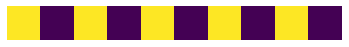

In [ ]:
N = 10
# PossibleValuesRules = {
#     0: (1, 3,),
#     1: (0,),
#     2: (1,),
#     3: (2,3)
# }
PossibleValuesRules = {
    0: (1,),
    1: (0,),
}
Line, AllLines = D1_WaveFunctionCollapse(N, PossibleValuesRules)
show_line(Line)
# animate_lines(AllLines);

In [ ]:
AllLines

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0]),
 array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0]),
 array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0]),
 array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0]),
 array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0]),
 array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0]),
 array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])]

# 2D

### Visualization

In [ ]:
# TODO: replace matplotlib image show with something else, something more flexible. Maybe custom rendering via opencv

In [ ]:
def show_image(Image, GridLines:int=0, LineColor:str='black'):
    """
    Shows an Image.
    
    Parameters
    ----------
    Image     : The Image to be shown in the form of a numpy Matrix
    GridLines : The number of pixels between each gridline in the X and Y direction. 0 turns off the grid an axis.
    LineColor : The color of the gridlines. Only used if GridLines is > 0
    """
    %matplotlib inline
    plt.imshow(Image)
    if not GridLines:
        plt.axis('off')
    else:
        plt.xticks(np.arange(-.5, Image.shape[1], GridLines))
        plt.yticks(np.arange(-.5, Image.shape[0], GridLines))
        plt.grid(color=LineColor, linewidth=4)

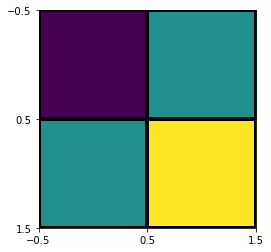

In [ ]:
show_image(np.array([[1, 2], [2, 3]]), GridLines=1)

In [ ]:
def animate_images(Images:list, GridLines:int=0, LineColor:str='black', interval:int=500):
    """
    Animates a list of Images as a repeating sequence.
    
    Parameters
    ----------
    Images    : A list of Images in the form of numpy Matrices
    GridLines : The number of pixels between each gridline in the X and Y direction. 0 turns off the grid an axis.
    LineColor : The color of the gridlines. Only used if GridLines is > 0
    interval  : The time between frames in milliseconds
    """
    %matplotlib notebook
    fig, ax = plt.subplots()
    img = ax.imshow(Images[-1], animated=True)
    if not GridLines:
        ax.axis('off')
    else:
        # TODO: For some stupid reason, the gridlines only work under specific circumstances
        ax.set_xticks(np.arange(-.5, Images[-1].shape[1], GridLines))
        ax.set_yticks(np.arange(-.5, Images[-1].shape[0], GridLines))
        ax.grid(color=LineColor, linewidth=4)
    
    def animate(frame, *fargs):
        img.set_data(frame)
    
    return animation.FuncAnimation(fig, animate, frames=Images, interval=interval, repeat=True)

<IPython.core.display.Javascript object>


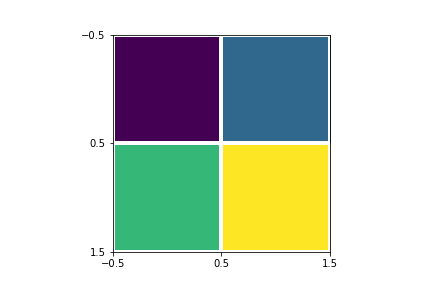

In [ ]:
animate_images(np.array([
    [[0, 0], [0, 0]],
    [[0, 0], [0, 1]],
    [[0, 0], [1, 2]],
    [[0, 1], [2, 3]],
    [[1, 2], [3, 4]],
]), GridLines=1, LineColor='white');

In [ ]:
# Convert a Wave Function to a render-able Image

def assemble_tiles(IntermediateImage):
    "Takes in a N x M x V x W x *_ Matrix and reshapes it to N*V x M*W x *_. "\
    "Basically it assembles a bunch of image patches into one image."
    return np.hstack(np.hstack(IntermediateImage))

def ImageFromPartialWaveFunction(N:int, M:int, Wave, TileMatrix, AsType:type=float):
    "Generate an Image from a partially collapsed WaveFunction by averaging over possible Tiles"
    ImageW = [[list() for _ in range(M)] for _ in range(N)] # N x M x Variable dimensional list
    for (X, Y, Vs) in np.argwhere(Wave):
        ImageW[X][Y].append(TileMatrix[Vs])
    ImageW2 = np.array([[np.mean(L2, axis=0) for L2 in L1] for L1 in ImageW]) # Average over the variable dimension
    ImageW3 = assemble_tiles(ImageW2)
    if AsType != int and np.max(ImageW3) > 2: print('Warning: Clipping values to 0-1. Did you mean to use AsType=int?')
    return ImageW3.astype(AsType)

def ImageFromCollapsedWaveFunction(N:int, M:int, Wave, TileMatrix, AsType:type=float):
    "Generate an Image from a collapsed WaveFunction."
    _, _, ImageValues = np.nonzero(Wave)
    assert ImageValues.shape == (N * M,)
    TileIndices = ImageValues.reshape(N, M)
    Image = assemble_tiles(TileMatrix[TileIndices])
    return Image.astype(AsType)

### Verify and Convert Rules

In [ ]:
def verify_rules_2D(Rules):
    for k, v in Rules.items():
        for Direction, AllowedValues in v.items():
            OppositeDirection = {'U':'D', 'D':'U', 'L':'R', 'R':'L'}[Direction]
            for Value in AllowedValues:
                assert (k in Rules[Value][OppositeDirection]), \
                f'{k} "{Direction}" allows {AllowedValues}, '\
                f'but {Value} "{OppositeDirection}" only allows {Rules[Value][OppositeDirection]}'

In [ ]:
def verify_rules_matrix_2D(RulesMatrix):
    OppositeDirection = {2:3, 3:2, 0:1, 1:0}
    for (ThisTile, TileRules) in enumerate(RulesMatrix):
        for (Direction, Rule) in enumerate(TileRules):
            for (OtherTile, IsAllowed) in enumerate(Rule):
                OtherDirection = OppositeDirection[Direction]
                OtherRule      = RulesMatrix[OtherTile][OtherDirection]
                OtherIsAllowed = OtherRule[ThisTile]
                assert IsAllowed == OtherIsAllowed, \
                f'Tile {ThisTile} and Tile {OtherTile} disagree on whether they can be next to each other.\n\t\t' \
                f'The Rule values should be identical at the following directions and indices:\n\t\t'\
                f'Tile {ThisTile} in direction {Direction} at index {OtherTile}, and '\
                f'Tile {OtherTile} in direction {OtherDirection} at index {ThisTile}:\n\t\t'\
                f'Tile {ThisTile}{[Direction]}: {Rule}[{OtherTile}] = {IsAllowed}\n\t\t'\
                f'Tile {OtherTile}{[OtherDirection]}: {OtherRule}[{ThisTile}] = {OtherIsAllowed}'

In [ ]:
def _rule_to_vector(TileAmount, Rule):
    return [(i in Rule) for i in range(TileAmount)]
def rules_to_np(Rules):
    TileAmount = len(Rules)
    return np.array([[_rule_to_vector(TileAmount, Rules[i][d]) for d in ('L', 'R', 'U', 'D')] for i in range(TileAmount)])

### Helper

In [ ]:
def Neighbours(X:int, Y:int, N:int, M:int) -> (int, int, int):
    """
    Generates a list of neighbouring coordinates for any cell on a grid.
    
    Parameters
    ----------
    X : The current X coordinate
    Y : The current Y coordinate
    N : The length of the Grid in X direction (shape[0])
    M : The length of the Grid in Y direction (shape[1])
    
    Returns
    -------
    D : The Direction you need to go to get back to the original coordinates.
        Left = 0 | Right = 1 | Up = 2 | Down = 3
    K : The X coordinate of the neighbour
    J : The Y coordinate of the neighbour
    """
    # {'L':0,'R':1,'U':2,'D':3}
    if (X - 1) >= 0      : yield (3, X - 1, Y    ) # 'D'
    if (X + 1) <= (N - 1): yield (2, X + 1, Y    ) # 'U'
    if (Y - 1) >= 0      : yield (1, X    , Y - 1) # 'R'
    if (Y + 1) <= (M - 1): yield (0, X    , Y + 1) # 'L'
# set(Neighbours(3, 1, 10, 10))

## Complete 2D WFC

In [ ]:
def WFC_2D(N:int, M:int, RulesMatrix):
    Wave = np.ones (shape=(N, M, len(RulesMatrix)), dtype=bool)
    X, Y = choice(N), choice(M) # Initial Cell Choice
    # TODO: Do a pre-pass here to handle global conditions? What if a tile can't be placed at the edge?
    # NOTE: Currently we don't treat the edge in and special way
    while True:
        # NOTE: Assign a Tile (from those available at this cell) to chosen Cell
        TileChoice              = choice(np.flatnonzero(Wave[X, Y])) # This assumes Tiles are stored/indexed like a list
        Wave [X, Y]             = False # Numpy Broadcasting
        Wave [X, Y][TileChoice] = True # This is used in the floodfill part to figure out what rules apply
        # NOTE: Floodfill to update all Cells whose Neighbours have changed
        CellsToCheck = set(Neighbours(X, Y, N, M))
        while len(CellsToCheck) > 0:
            NewCellsToCheck = set()
            for (_, K, J) in CellsToCheck:
                # NOTE: Check all Rules of this Cell, and modify Wave accordingly.
                CurrentWave    = Wave[K, J]
                CurrentWaveNew = np.ones_like(CurrentWave)
                if CurrentWave.sum() <= 1: continue # Only one remaining state -> this cell is already collapsed
                # TODO: Technically we only need to check this for neighbours that have changed,
                #       but keeping track of that seems like it might be more effort than just checking all neighbours.
                # TODO: This loop can probably also be done in numpy
                for (D, U, V) in Neighbours(K, J, N, M):
                    # NOTE: A vector of which Tiles this Neighbour allows in the Cell we're updating
                    # If any of the tiles possible at this neighbour allow a certain tile to be placed in the current cell,
                    # then that tile can't be excluded from the wave function of possible states yet.
                    # If no possible tile at this neighbour can be placed next to a certain tile,
                    # then that tile must be removed from the wavefunction of the current cell.
                    OtherConstraint = RulesMatrix[np.flatnonzero(Wave[U, V])][:, D].any(axis=0)
                    # Logical AND -> one neighbour disallowing a tile means that tile cant be used at all in current cell
                    CurrentWaveNew &= OtherConstraint
                if np.sum(CurrentWaveNew) == 0: raise Exception(f'Arrived at an unsolvable solution. {K, J}')
                if np.any(CurrentWave != CurrentWaveNew):
                    NewCellsToCheck.update(Neighbours(K, J, N, M))
                Wave[K, J] = CurrentWaveNew
            CellsToCheck = NewCellsToCheck
        CellEntropy = Wave.sum(axis=-1) # Number of remaining States per cell
        if np.all(CellEntropy == 1): break # STOP Condition
        yield deepcopy(Wave)
        # NOTE: Select next Cell based on lowest Entroy
        LowestUncollapsedEntropy = np.min(CellEntropy[CellEntropy != 1])
        assert LowestUncollapsedEntropy > 1, f'1 means the cell should already be collapsed, and < 0 should be impossible.'
        OptionsForNextCell = np.argwhere(CellEntropy == LowestUncollapsedEntropy) # Un-collapsed Cells with the lowest Entropy
        X, Y = OptionsForNextCell[choice(len(OptionsForNextCell))]
    yield Wave

## Define Tiles and Rules Manually

In [ ]:
Tiles = [
    [[0, 1], [0, 0]],
    [[0, 0], [1, 1]],
    [[1, 0], [1, 0]],
    [[0, 0], [0, 0]],
]
TilesMatrix = np.array(Tiles); TilesMatrix.shape, TilesMatrix

((4, 2, 2),
 array([[[0, 1],
         [0, 0]],
 
        [[0, 0],
         [1, 1]],
 
        [[1, 0],
         [1, 0]],
 
        [[0, 0],
         [0, 0]]]))

In [ ]:
Rules = {
    0: {
        'L' : (2,3),
        'R' : (2,3),
        'U' : (1,3),
        'D' : (1,2,3),
    },
    1: {
        'L' : (1,3),
        'R' : (1,2,3),
        'U' : (0,3),
        'D' : (0,3),
    },
    2: {
        'L' : (0,1,3),
        'R' : (0,3),
        'U' : (0,3),
        'D' : (3,),
    },
    3: {
        'L' : (0,1,2),
        'R' : (0,1,2),
        'U' : (0,1,2),
        'D' : (0,1,2),
    },
}
verify_rules_2D(Rules)

In [ ]:
RulesMatrix = rules_to_np(Rules); RulesMatrix.shape

(4, 4, 4)

In [ ]:
verify_rules_matrix_2D(RulesMatrix)

In [ ]:
N, M = 10, 10
AllWaves = list(WFC_2D(N, M, RulesMatrix))
AllWaves = [ImageFromPartialWaveFunction(N, M, W, TilesMatrix) for W in AllWaves]

<IPython.core.display.Javascript object>


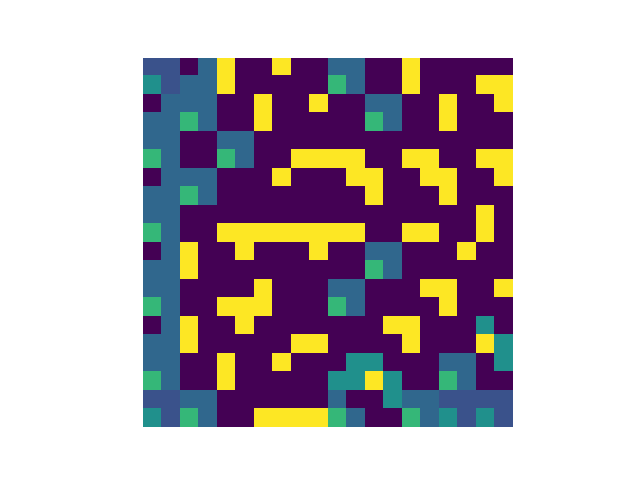

In [ ]:
animate_images(AllWaves);

## Edge Based Automatic Rule Inference from existing Tiles

In [ ]:
def generate_triangle_masks(TileSize:int):
    "Returns 4 boolean Masks used for indexing into the different \"X\" quadrants of a Matrix of shape TileSize x TileSize."
    LowerTriangle = np.tri(TileSize, TileSize, 0, dtype=bool)
    UpperTriangle = LowerTriangle.T
    FlippedLowerTriangle = np.fliplr(LowerTriangle)
    FlippedUpperTriangle = np.fliplr(UpperTriangle)
    Up    = UpperTriangle & FlippedUpperTriangle
    Right = UpperTriangle & FlippedLowerTriangle
    Down  = LowerTriangle & FlippedLowerTriangle
    Left  = LowerTriangle & FlippedUpperTriangle
    return Up, Right, Down, Left

In [ ]:
def interpolate_colors(ColorA, ColorB): return ((ColorA + ColorB) // 2).astype(int)

In [ ]:
def generate_triangle_tile(TileSize:int, UpColor, RightColor, DownColor, LeftColor):
    "Generates a RGB image of shape TileSize x TileSize, with up to four different colours in an \"X\" shape."
    Up, Right, Down, Left = generate_triangle_masks(TileSize)
    Tile = np.zeros(shape=(TileSize, TileSize, 3), dtype=int)
    
    UpRightInterfaceColor   = interpolate_colors(UpColor  , RightColor)
    DownRightInterfaceColor = interpolate_colors(DownColor, RightColor)
    DownLeftInterfaceColor  = interpolate_colors(DownColor, LeftColor)
    UpLeftInterfaceColor    = interpolate_colors(UpColor  , LeftColor)
    
    Tile[Up]    = UpColor
    Tile[Right] = RightColor
    Tile[Down]  = DownColor
    Tile[Left]  = LeftColor
    
    Tile[Up & Right]   = UpRightInterfaceColor
    Tile[Down & Right] = DownRightInterfaceColor
    Tile[Down & Left]  = DownLeftInterfaceColor
    Tile[Up & Left]    = UpLeftInterfaceColor
    return Tile

https://en.wikipedia.org/wiki/Wang_tile  
https://en.wikipedia.org/wiki/Wang_tile#/media/File:Wang_11_tiles.svg  
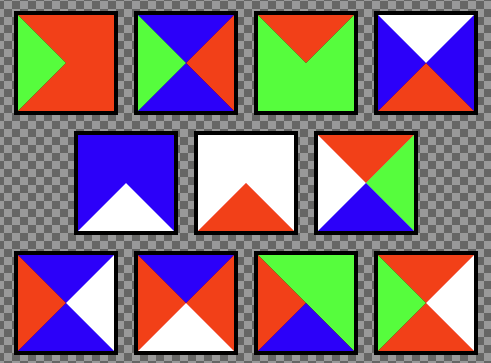

In [ ]:
WHITE = np.array([255, 255, 255])
RED   = np.array([255,   0,   0])
GREEN = np.array([  0, 255,   0])
BLUE  = np.array([  0,   0, 255])

In [ ]:
TileSize = 120
Tile01 = generate_triangle_tile(TileSize, RED  , RED  , RED  , GREEN)
Tile02 = generate_triangle_tile(TileSize, BLUE , RED  , BLUE , GREEN)
Tile03 = generate_triangle_tile(TileSize, RED  , GREEN, GREEN, GREEN)
Tile04 = generate_triangle_tile(TileSize, WHITE, BLUE , RED  , BLUE)
Tile05 = generate_triangle_tile(TileSize, BLUE , BLUE , WHITE, BLUE)
Tile06 = generate_triangle_tile(TileSize, WHITE, WHITE, RED  , WHITE)
Tile07 = generate_triangle_tile(TileSize, RED  , GREEN, BLUE , WHITE)
Tile08 = generate_triangle_tile(TileSize, BLUE , WHITE, BLUE , RED)
Tile09 = generate_triangle_tile(TileSize, BLUE , RED  , WHITE, RED)
Tile10 = generate_triangle_tile(TileSize, GREEN, GREEN, BLUE , RED)
Tile11 = generate_triangle_tile(TileSize, RED  , WHITE, RED  , GREEN)
TilesMatrix = np.array([Tile01, Tile02, Tile03, Tile04, Tile05, Tile06, Tile07, Tile08, Tile09, Tile10, Tile11])
TilesMatrix.shape

(11, 120, 120, 3)

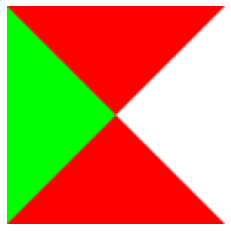

In [ ]:
show_image(Tile11)

In [ ]:
def get_edge_colors(Tile):
    ShapeX, ShapeY, *_ = Tile.shape
    LeftColor  = Tile[ShapeX//2,         0]
    RightColor = Tile[ShapeX//2,        -1]
    UpColor    = Tile[        0, ShapeY//2]
    DownColor  = Tile[       -1, ShapeY//2]
    return LeftColor, RightColor, UpColor, DownColor

def infer_rules_from_edge_colors(TilesMatrix):
    # NOTE: RulesMatrix is created with the last two axis swapped, which is then corrected at the end.
    #       The reason for doing this is that this way we can do the checks for all four directions at once.
    RulesList = [] # NOTE: It's important this uses the ordering: 'L', 'R', 'U', 'D'
    for Tile in TilesMatrix:
        CurrentRules = []
        LeftColor, RightColor, UpColor, DownColor = get_edge_colors(Tile)
        for OtherTile in TilesMatrix:
            OtherLeftColor, OtherRightColor, OtherUpColor, OtherDownColor = get_edge_colors(OtherTile)            
            CurrentRules.append(np.array([LeftColor == OtherRightColor, RightColor == OtherLeftColor, 
                                            UpColor ==  OtherDownColor,  DownColor ==   OtherUpColor],
                                         dtype=bool).all(axis=-1))
        RulesList.append(CurrentRules)
    RulesMatrix = np.swapaxes(np.array(RulesList), -1, -2)
    return RulesMatrix

In [ ]:
RulesMatrix = infer_rules_from_edge_colors(TilesMatrix)
RulesMatrix.shape

(11, 4, 11)

In [ ]:
verify_rules_matrix_2D(RulesMatrix)

In [ ]:
N, M = 10, 10
AllWaves = list(WFC_2D(N, M, RulesMatrix))
AllWaves = [ImageFromPartialWaveFunction(N, M, W, TilesMatrix, int) for W in AllWaves]

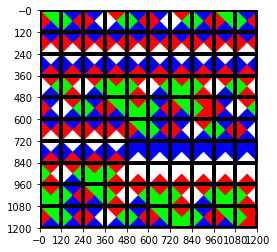

In [ ]:
show_image(AllWaves[-1], GridLines=120)

<IPython.core.display.Javascript object>


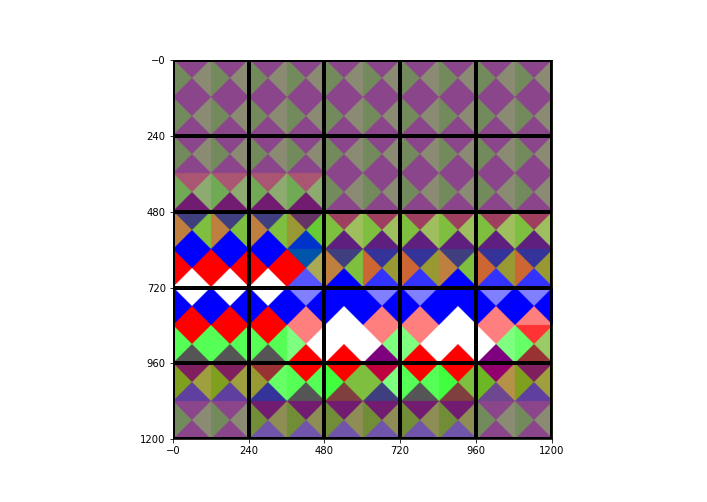

In [ ]:
animate_images(AllWaves, GridLines=120*2, LineColor='black');

## Automatic Tile and Rule Inference from Sample Image

https://github.com/mxgmn/WaveFunctionCollapse  
https://raw.githubusercontent.com/mxgmn/WaveFunctionCollapse/master/images/wfc.png

In [ ]:
def infer_tiles_and_rules(SampleImage, TileSize):
    SampleX, SampleY, Channels = SampleImage.shape
    OverhangX = SampleX % TileSize
    OverhangY = SampleY % TileSize
    Tiles = list()
    Rules = defaultdict(lambda:{'L':[], 'R':[], 'U':[], 'D':[]})
    for OffsetX in range(TileSize):
        for OffsetY in range (TileSize):
            ToX    = (SampleX - OverhangX + OffsetX)
            if ToX > SampleX: ToX -= TileSize # Works as long as 0 <= OffsetX <= TileSize
            ToY    = (SampleY - OverhangY + OffsetY)
            if ToY > SampleY: ToY -= TileSize # Works as long as 0 <= OffsetY <= TileSize
            
            NrTilesX = (ToX - OffsetX) // TileSize
            NrTilesY = (ToY - OffsetY) // TileSize
            
            # NOTE: Get all Tiles making up the image, and store their relative coordinates to each other for rule inference.
            TileCoordinates = list()
            for (X, TileList) in enumerate(SampleImage[OffsetX:ToX, OffsetY:ToY].
                                           reshape(NrTilesX, TileSize, NrTilesY, TileSize, Channels).swapaxes(1, 2)):
                TileCoordinatesY = list()
                TileCoordinates.append(TileCoordinatesY)
                for (Y, Tile) in enumerate(TileList):
                    for (TileNr, ExistingTile) in enumerate(Tiles): # NOTE: Deduplicate Tiles
                        if np.allclose(Tile, ExistingTile):
                            TileCoordinatesY.append(TileNr)
                            break
                    else:
                        TileCoordinatesY.append(len(Tiles))
                        Tiles.append(Tile)
            # NOTE: Figure out neighbourhood rules for this Offset
            #       For a different Offset the current indices aren't valid, so there's no point in waiting.
            # TODO: I feel like something is still broken here. The outputs dont look right a good amount of the time.
            #       Maybe that's just how it's supposed to look though.
            #       Also possible that it would need frequency data to get more accurate.
            N = len(TileCoordinates)
            for (X, TileNrList) in enumerate(TileCoordinates):
                M = len(TileNrList)
                for (Y, TileNr) in enumerate(TileNrList):
                    # NOTE: These are NOT reversed directions. We're just listing out what tiles are next to the current tile.
                    TileRules = Rules[TileNr]
                    if (X - 1) >= 0      :  TileRules['U'].append(TileCoordinates[X - 1][Y    ])
                    if (X + 1) <= (N - 1):  TileRules['D'].append(TileCoordinates[X + 1][Y    ])
                    if (Y - 1) >= 0      :  TileRules['L'].append(TileCoordinates[X    ][Y - 1])
                    if (Y + 1) <= (M - 1):  TileRules['R'].append(TileCoordinates[X    ][Y + 1])
    TilesMatrix = np.array(Tiles)
    RulesMatrix = rules_to_np(Rules)
    verify_rules_matrix_2D(RulesMatrix)
    return TilesMatrix, RulesMatrix

In [ ]:
def load_sample_image(ImagePath:Path):
    SampleImage = cv2.imread(ImagePath.as_posix()).astype(int)
    # NOTE: For some reason cv loads colors as BGR in this case? Swap them here to get RGB.
    SampleImage[:, :, [0, 2]] = SampleImage[:, :, [2, 0]]
    return SampleImage

In [ ]:
def wrap_image(Image, TileSize:int):
    WrapAmount = TileSize - 1
    return np.pad(Image, pad_width=((WrapAmount, WrapAmount), (WrapAmount, WrapAmount), (0, 0)), mode='wrap')

In [ ]:
ROOT = Path('./data/Samples')
# SamplePath = ROOT/'CavesSample.png'
# SamplePath = ROOT/'CitySample.png'
SamplePath = ROOT/'FlowersSample.png'
# SamplePath = ROOT/'HousesSample.png'
# SamplePath = ROOT/'MazeSample.png'
SamplePath.is_file()

True

In [ ]:
SampleImage = load_sample_image(SamplePath)

In [ ]:
TileSize = 3

In [ ]:
SampleImage = wrap_image(SampleImage, TileSize)

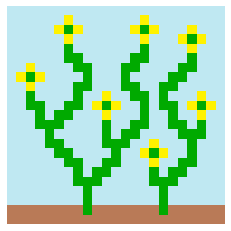

In [ ]:
show_image(SampleImage)

In [ ]:
TilesMatrix, RulesMatrix = infer_tiles_and_rules(SampleImage, TileSize)
TilesMatrix.shape, RulesMatrix.shape

((96, 3, 3, 3), (96, 4, 96))

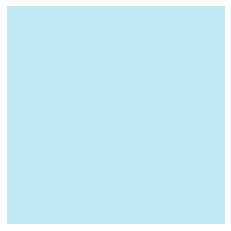

In [ ]:
show_image(TilesMatrix[0])

In [ ]:
RulesMatrix[0]

array([[ True,  True,  True,  True, False,  True, False, False,  True,
         True,  True, False,  True, False,  True, False,  True, False,
         True, False, False, False,  True, False,  True, False, False,
        False,  True,  True,  True,  True, False,  True, False,  True,
        False,  True, False,  True, False, False,  True, False,  True,
        False,  True, False,  True, False, False,  True,  True, False,
         True,  True, False, False, False,  True, False,  True,  True,
        False, False, False, False,  True, False,  True, False,  True,
        False, False,  True,  True, False, False, False,  True,  True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False],
       [ True,  True,  True,  True, False, False,  True, False,  True,
         True,  True,  True, False,  True, False,  True, False,  True,
        False,  True, False,  True, False,  True, False,  True,  True,
        False, False, Fals

In [ ]:
N, M = 20, 20
AllWaves = list(WFC_2D(N, M, RulesMatrix))

In [ ]:
AllWaves = [ImageFromPartialWaveFunction(N, M, W, TilesMatrix, AsType=int) for W in AllWaves]

<IPython.core.display.Javascript object>


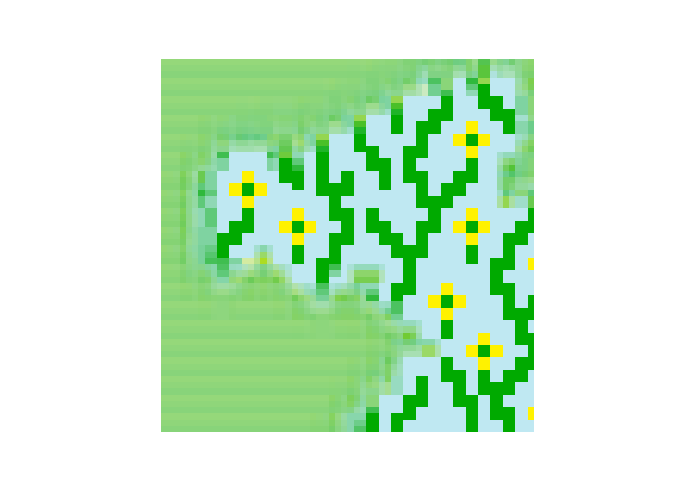

In [ ]:
animate_images(AllWaves);

<IPython.core.display.Javascript object>


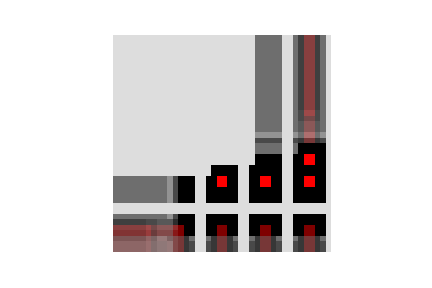

In [ ]:
animate_images(AllWaves);

<IPython.core.display.Javascript object>


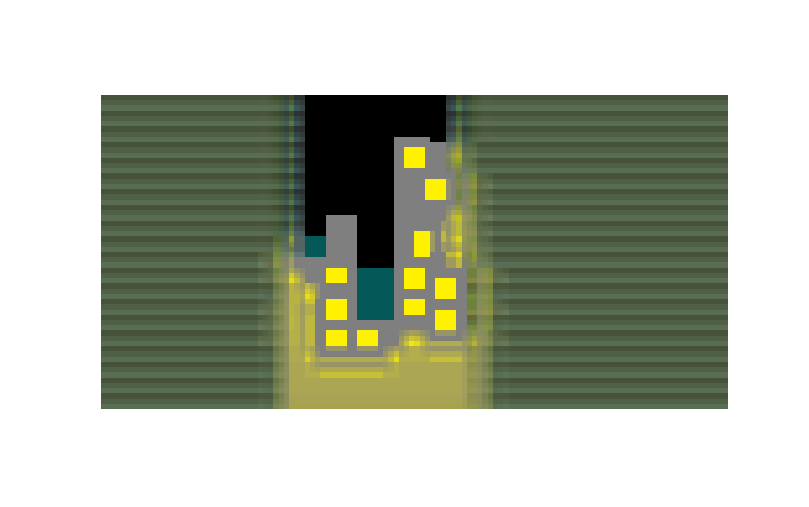

In [ ]:
animate_images(AllWaves);

```python
# NOT DEDUPLICATED
show_image(assemble_tiles(TilesMatrix.reshape(6, 6, 3, 3, 3), GridLines=TileSize, LineColor='white')
```
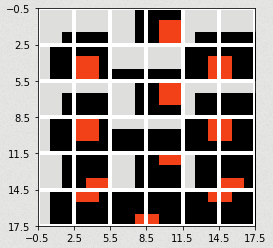

```python
# DEDUPLICATED
# Padding to make a square number of tiles
TilesMatrixPadded = np.stack([*TilesMatrix, TilesMatrix[-1]], axis=0)
show_image(assemble_tiles(TilesMatrixPadded.reshape(5, 5, 3, 3, 3)), GridLines=TileSize, LineColor='white')
```
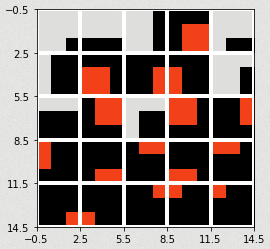

This code was used to create the Tile visualizations above  
```python
def foo(SampleImage, TileSize, DEDUPLICATE:bool):
    OverhangX = SampleX % TileSize
    OverhangY = SampleY % TileSize
    Tiles = list()
    for OffsetX in range(TileSize):
        for OffsetY in range (TileSize):
            ToX    = SampleX - OverhangX + OffsetX
            if ToX > SampleX: ToX -= TileSize # Works as long as 0 <= Offset <= TileSize
            ToY    = SampleY - OverhangY + OffsetY
            if ToY > SampleY: ToY -= TileSize # Works as long as 0 <= Offset <= TileSize

            NrTilesX = (ToX - OffsetX) // TileSize
            NrTilesY = (ToY - OffsetY) // TileSize

            for TileList in SampleImage[OffsetX:ToX, OffsetY:ToY].
                            reshape(NrTilesX, TileSize, NrTilesY, TileSize, Channels).swapaxes(1, 2):
                if DEDUPLICATE:
                    for Tile in TileList:
                        for ExistingTile in Tiles:
                            if np.allclose(Tile, ExistingTile): break
                        else: Tiles.append(Tile)
                else: Tiles.extend(TileList)
    TilesMatrix = np.array(Tiles)
    return TilesMatrix
```